In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('results/single_node_allreduce.csv', names=['Backend + Device', 'Tensor Size', 'World Size', 'Time'])
df

,Backend + Device,Tensor Size,World Size,Time
0,GLOO + CPU,256 KB,2,0.000748
1,GLOO + CPU,512 KB,2,0.000677
2,GLOO + CPU,1 MB,2,0.000896
3,GLOO + CPU,10 MB,2,0.006620
4,GLOO + CPU,50 MB,2,0.034000
...,...,...,...,...
67,NCCL + CUDA,10 MB,6,0.000219
68,NCCL + CUDA,50 MB,6,0.000341
69,NCCL + CUDA,100 MB,6,0.000550
70,NCCL + CUDA,500 MB,6,0.002300


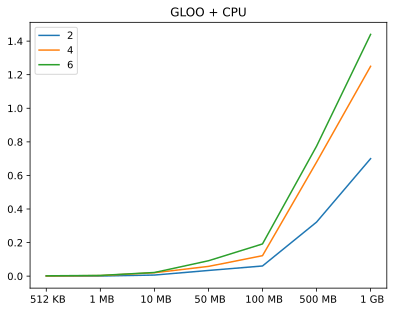

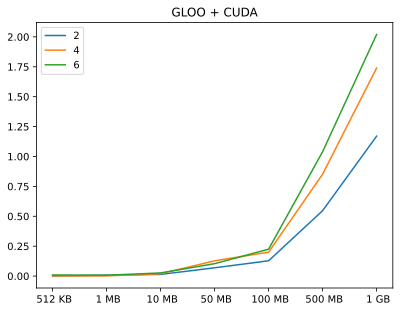

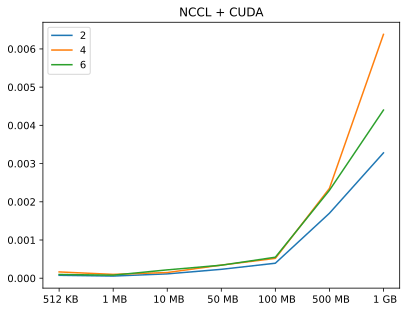

In [3]:
%config InlineBackend.figure_formats = ['svg']
for backend_device in df['Backend + Device'].unique():
    sub_df = df[df['Backend + Device'] == backend_device]
    # print(sub_df)
    plt.title(backend_device)
    for world_size in sub_df['World Size'].unique():
        sub_sub_df = sub_df[sub_df['World Size'] == world_size]
        plt.plot(sub_sub_df['Tensor Size'][1:], sub_sub_df['Time'][1:], label=f'{world_size}')
    plt.legend()
    plt.show()